In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd
import seaborn as sns
import graphviz
from typing import Tuple
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation


sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

***PROBLEM 1***

In [6]:
cancer = pd.read_csv("/breast_cancer_data.csv")
cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
len(cancer['id'])

569

In [7]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_se,symmetry_se,fractal_se,radius_extreme,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
column = cancer["texture_mean"]
maximum = column.max()
minimum = column.min()
print(maximum, minimum)

39.28 9.71


In [9]:
cancer.diagnosis = [1 if i=="M" else 0 for i in cancer.diagnosis]
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_se,symmetry_se,fractal_se,radius_extreme,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [10]:
dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)

features=["texture_mean"]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(max_depth=3)

In [11]:
def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

***PROBLEM 1.1***

In [12]:
print("The Gini Index for the dataset is : {}".format(gini_index(len(cancer[cancer.diagnosis == 0])/len(cancer)))) #arg for gini function is class_ratio

The Gini Index for the dataset is : 0.4675300607546925


***PROBLEM 1.2***

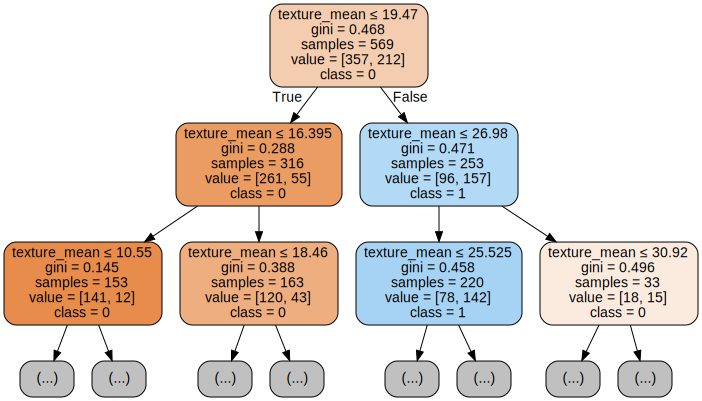

In [13]:
dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=2,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph

In [14]:
dt_model = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
)

features=["texture_mean"]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

***PROBLEM 1.3*** 

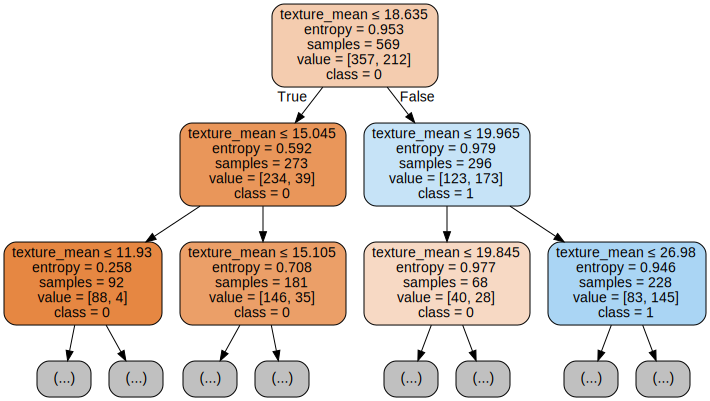

In [15]:
dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=2,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph

***PROBLEM 2***

In [16]:
features = [
    "radius_extreme",
    "texture_extreme",
    "perimeter_extreme",

]
label = "label"

# train test split
X_raw, X_raw_test, Y, Y_test = train_test_split(cancer[features].values, cancer[label].values, test_size=0.2, random_state=42)

# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X_test = scaler.transform(X_raw_test)

# formatting
Y = Y.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

In [17]:
def sigmoid(x):
    """Calculates sigmoid function."""
    return 1. / (1 + np.exp(-x))

def reLU(x):
    return np.maximum(0.0,x)

# parameters for the first layer
W_1 = np.ones((5, X.shape[1]))
print(f"Shape of W_1 is {W_1.shape}")

b_1 = np.ones((5, 1))*0.1
print(f"Shape of b_1 is {b_1.shape}")

# parameters for the second layer
W_2 = np.ones((1, 5))
print(f"Shape of W_2 is {W_2.shape}")

b_2 = np.ones((1, 1))*0.1
print(f"Shape of b_2 is {b_2.shape}")

# calculate the forward propagation
Z_1 = X @ W_1.T
print(f"\nShape of Z_1 is {Z_1.shape}")
print("Samples for Z_1:")
print(Z_1[:5])

A_1 = reLU(Z_1 + b_1.T) 
print(f"Shape of A_1 is {A_1.shape}")
print("Samples for A_1:")
print(A_1[:5])

Z_2 = A_1 @ W_2.T
print(f"\nShape of Z_2 is {Z_2.shape}")
print("Samples for Z_2:")
print(Z_1[:5])

A_2 = Y_hat = sigmoid(Z_2 + b_2.T)
print(f"Shape of A_2 is {A_2.shape}")
print("Samples for A_2:")
print(A_2[:5])

Shape of W_1 is (5, 3)
Shape of b_1 is (5, 1)
Shape of W_2 is (1, 5)
Shape of b_2 is (1, 1)

Shape of Z_1 is (455, 5)
Samples for Z_1:
[[-2.95709089 -2.95709089 -2.95709089 -2.95709089 -2.95709089]
 [ 5.56621025  5.56621025  5.56621025  5.56621025  5.56621025]
 [-3.58131533 -3.58131533 -3.58131533 -3.58131533 -3.58131533]
 [-0.10923906 -0.10923906 -0.10923906 -0.10923906 -0.10923906]
 [-3.53688319 -3.53688319 -3.53688319 -3.53688319 -3.53688319]]
Shape of A_1 is (455, 5)
Samples for A_1:
[[0.         0.         0.         0.         0.        ]
 [5.66621025 5.66621025 5.66621025 5.66621025 5.66621025]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]

Shape of Z_2 is (455, 1)
Samples for Z_2:
[[-2.95709089 -2.95709089 -2.95709089 -2.95709089 -2.95709089]
 [ 5.56621025  5.56621025  5.56621025  5.56621025  5.56621025]
 [-3.58131533 -3.58131533 -3.58131533 -3.581315

In [18]:
model = Sequential()     
model.add(Dense(5, input_shape = (569,3), activation = 'relu'))     
model.add(Dense(1, activation = 'sigmoid')) 

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

***PROBLEM 2.1***

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 569, 5)            20        
                                                                 
 dense_1 (Dense)             (None, 569, 1)            6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


***PROBLEM 2.2***

In [28]:
print(np.mean(Y_hat))

0.7155332180761279


In [23]:
avg_prediction = sum((A_2)/A_2.shape[0])[0]
print(avg_prediction)

0.715533218076125


***PROBLEM 2.3***

In [26]:
loss = -np.mean(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat+1E-16)))
print(loss)

0.6983866220951158
